In [1]:
from A_Hierarchical_DBSCAN_Method.main import hierarchical_DBSCAN
from A_Hierarchical_DBSCAN_Method import EvaluationMeasures as EMdbscan
from MICROscope.main import MICROscope
from MICROscope import EvaluationMeasures as EMmicroscope
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "Test_Projects/JPetStore/OneFileSource.java"
alpha = 1
min_samples = 2
epsilon = np.arange(0.5, 1, 0.05)
threshold = np.arange(0.1, 0.6, 0.05)
n_clusters = [3 for _ in threshold]

In [3]:
layers_DBSCAN, classes_info_DBSCAN = hierarchical_DBSCAN(file_path, alpha, min_samples, epsilon)


[hierarchical_DBSCAN] parsing the code... done!
[hierarchical_DBSCAN] analyzing method calls... done!
[hierarchical_DBSCAN] building class similarity matrix


[nltk_data] Downloading package punkt to /home/morteza24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morteza24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[SimilarityAnalysis] 100%
[hierarchical_DBSCAN] done!


In [4]:
# MICROscope(file_path, alpha, n_clusters, threshold)
layers_MICROscope, classes_info_MICROscope = MICROscope(file_path, alpha, n_clusters, threshold)


[MICROscope] parsing the code... done!
[MICROscope] analyzing method calls... done!
[MICROscope] building class similarity matrix
[StructuralSimilarity] 100%
[MICROscope] class similarity matrix built successfully!


In [5]:
ICP_MICROscope, ICP_DBSCAN = [], []
NED_MICROscope, NED_DBSCAN = [], []
SM_MICROscope, SM_DBSCAN = [], []
IFN_MICROscope, IFN_DBSCAN = [], []
for i in range(len(threshold)):
    SM_MICROscope.append(EMmicroscope.SM(layers_MICROscope[i], classes_info_MICROscope))
    ICP_MICROscope.append(EMmicroscope.ICP(layers_MICROscope[i], classes_info_MICROscope))
    NED_MICROscope.append(EMmicroscope.NED(layers_MICROscope[i]))
for i in range(len(epsilon)):
    SM_DBSCAN.append(EMdbscan.SM(layers_DBSCAN[i], classes_info_DBSCAN))
    ICP_DBSCAN.append(EMdbscan.ICP(layers_DBSCAN[i], classes_info_DBSCAN))
    NED_DBSCAN.append(EMdbscan.NED(layers_DBSCAN[i]))

/home/morteza24/repos/Monolith-to-Microservice/A_Hierarchical_DBSCAN_Method/EvaluationMeasures.py:73: RuntimeWarning: invalid value encountered in scalar divide
  structural_modularity = SM1 / K - SM2 / ((K*(K-1))/2)


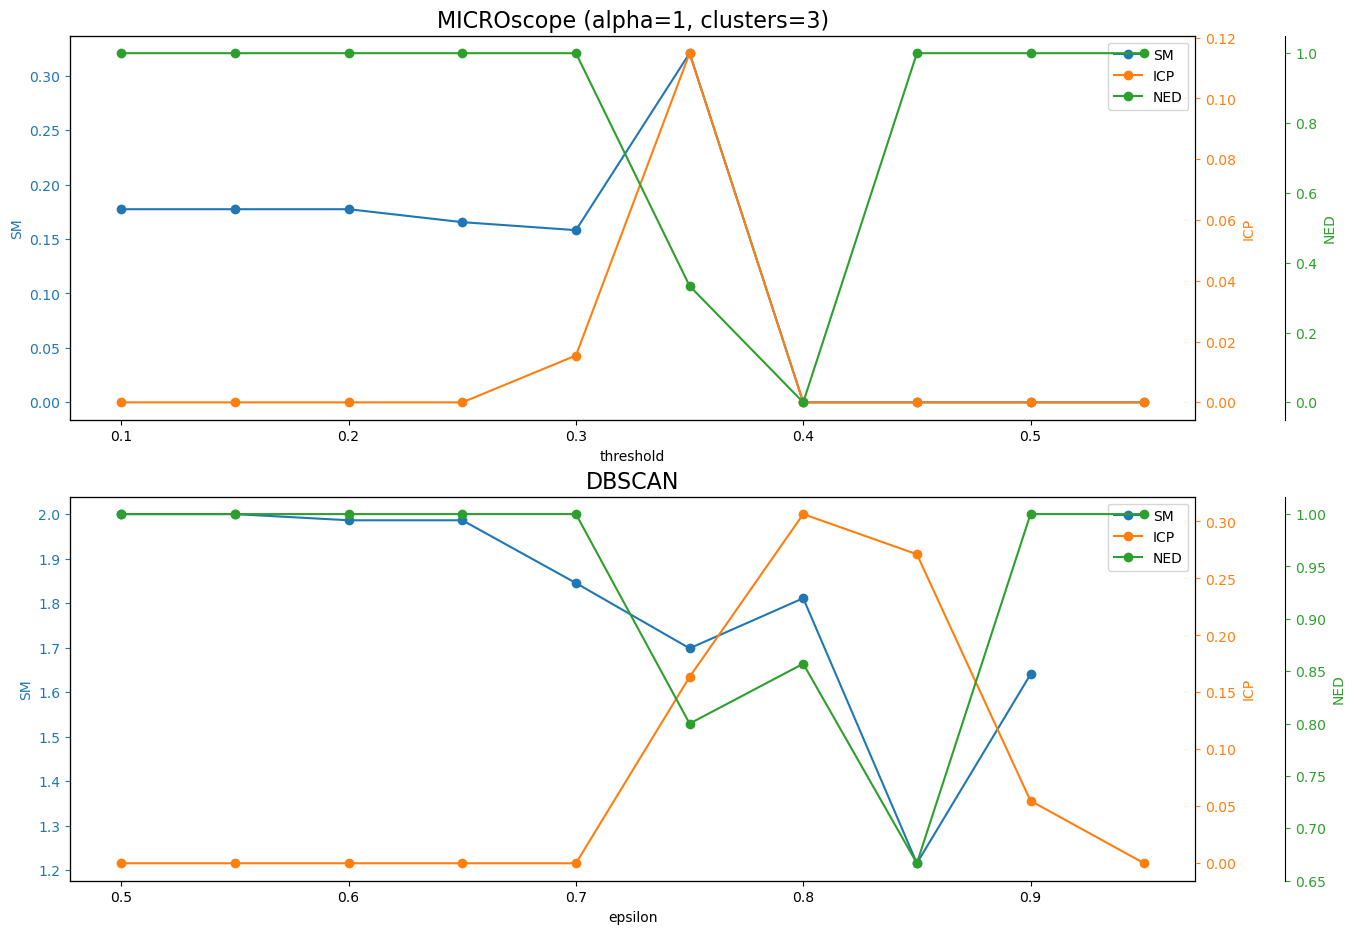

In [6]:
plt.rcParams["figure.figsize"] = (18,2.5)
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(right=0.75, bottom=-2.5)
axs[0].set_title('MICROscope (alpha=1, clusters=3)', fontsize=16)
twin1 = axs[0].twinx()
twin2 = axs[0].twinx()
twin2.spines.right.set_position(("axes", 1.08))
p1, = axs[0].plot(threshold, SM_MICROscope, "-oC0", label="SM")
p2, = twin1.plot(threshold, ICP_MICROscope, "-oC1", label="ICP")
p3, = twin2.plot(threshold, NED_MICROscope, "-oC2", label="NED")
axs[0].set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="NED")
axs[0].yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
axs[0].tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())
axs[0].legend(handles=[p1, p2, p3])
axs[1].set_title('DBSCAN', fontsize=16)
twin3 = axs[1].twinx()
twin4 = axs[1].twinx()
twin4.spines.right.set_position(("axes", 1.08))
p4, = axs[1].plot(epsilon, SM_DBSCAN, "-oC0", label="SM")
p5, = twin3.plot(epsilon, ICP_DBSCAN, "-oC1", label="ICP")
p6, = twin4.plot(epsilon, NED_DBSCAN, "-oC2", label="NED")
axs[1].set(xlabel="epsilon", ylabel="SM")
twin3.set(ylabel="ICP")
twin4.set(ylabel="NED")
axs[1].yaxis.label.set_color(p4.get_color())
twin3.yaxis.label.set_color(p5.get_color())
twin4.yaxis.label.set_color(p6.get_color())
axs[1].tick_params(axis='y', colors=p4.get_color())
twin3.tick_params(axis='y', colors=p5.get_color())
twin4.tick_params(axis='y', colors=p6.get_color())
axs[1].legend(handles=[p4, p5, p6])
plt.show()

In [7]:
file_path = "Test_Projects/JPetStore/OneFileSource.java"
alpha = 1
min_samples = 2
epsilon = np.arange(0.5, 1, 0.05)
threshold = np.arange(0.1, 0.6, 0.05)
n_clusters = [4 for _ in threshold]

In [8]:
layers_DBSCAN, classes_info_DBSCAN = hierarchical_DBSCAN(file_path, alpha, min_samples, epsilon)


[hierarchical_DBSCAN] parsing the code... done!
[hierarchical_DBSCAN] analyzing method calls... done!
[hierarchical_DBSCAN] building class similarity matrix


[nltk_data] Downloading package punkt to /home/morteza24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morteza24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[SimilarityAnalysis] 100%
[hierarchical_DBSCAN] done!


In [9]:
# MICROscope(file_path, alpha, n_clusters, threshold)
layers_MICROscope, classes_info_MICROscope = MICROscope(file_path, alpha, n_clusters, threshold)


[MICROscope] parsing the code... done!
[MICROscope] analyzing method calls... done!
[MICROscope] building class similarity matrix
[StructuralSimilarity] 100%
[MICROscope] class similarity matrix built successfully!


In [10]:
ICP_MICROscope, ICP_DBSCAN = [], []
NED_MICROscope, NED_DBSCAN = [], []
SM_MICROscope, SM_DBSCAN = [], []
IFN_MICROscope, IFN_DBSCAN = [], []
for i in range(len(threshold)):
    SM_MICROscope.append(EMmicroscope.SM(layers_MICROscope[i], classes_info_MICROscope))
    ICP_MICROscope.append(EMmicroscope.ICP(layers_MICROscope[i], classes_info_MICROscope))
    NED_MICROscope.append(EMmicroscope.NED(layers_MICROscope[i]))
for i in range(len(epsilon)):
    SM_DBSCAN.append(EMdbscan.SM(layers_DBSCAN[i], classes_info_DBSCAN))
    ICP_DBSCAN.append(EMdbscan.ICP(layers_DBSCAN[i], classes_info_DBSCAN))
    NED_DBSCAN.append(EMdbscan.NED(layers_DBSCAN[i]))

/home/morteza24/repos/Monolith-to-Microservice/A_Hierarchical_DBSCAN_Method/EvaluationMeasures.py:73: RuntimeWarning: invalid value encountered in scalar divide
  structural_modularity = SM1 / K - SM2 / ((K*(K-1))/2)


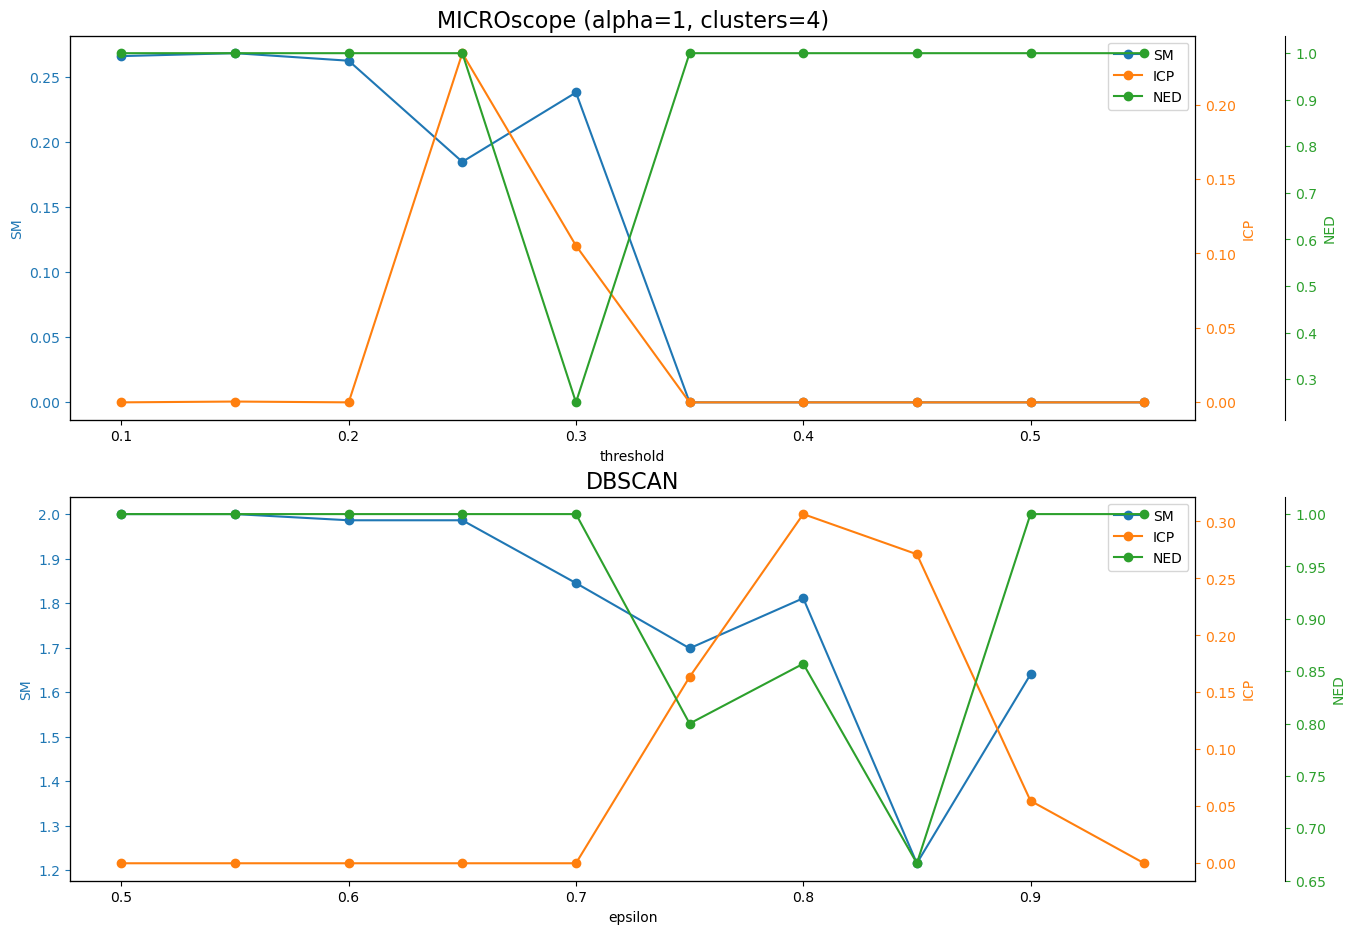

In [11]:
plt.rcParams["figure.figsize"] = (18,2.5)
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(right=0.75, bottom=-2.5)
axs[0].set_title('MICROscope (alpha=1, clusters=4)', fontsize=16)
twin1 = axs[0].twinx()
twin2 = axs[0].twinx()
twin2.spines.right.set_position(("axes", 1.08))
p1, = axs[0].plot(threshold, SM_MICROscope, "-oC0", label="SM")
p2, = twin1.plot(threshold, ICP_MICROscope, "-oC1", label="ICP")
p3, = twin2.plot(threshold, NED_MICROscope, "-oC2", label="NED")
axs[0].set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="NED")
axs[0].yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
axs[0].tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())
axs[0].legend(handles=[p1, p2, p3])
axs[1].set_title('DBSCAN', fontsize=16)
twin3 = axs[1].twinx()
twin4 = axs[1].twinx()
twin4.spines.right.set_position(("axes", 1.08))
p4, = axs[1].plot(epsilon, SM_DBSCAN, "-oC0", label="SM")
p5, = twin3.plot(epsilon, ICP_DBSCAN, "-oC1", label="ICP")
p6, = twin4.plot(epsilon, NED_DBSCAN, "-oC2", label="NED")
axs[1].set(xlabel="epsilon", ylabel="SM")
twin3.set(ylabel="ICP")
twin4.set(ylabel="NED")
axs[1].yaxis.label.set_color(p4.get_color())
twin3.yaxis.label.set_color(p5.get_color())
twin4.yaxis.label.set_color(p6.get_color())
axs[1].tick_params(axis='y', colors=p4.get_color())
twin3.tick_params(axis='y', colors=p5.get_color())
twin4.tick_params(axis='y', colors=p6.get_color())
axs[1].legend(handles=[p4, p5, p6])
plt.show()

In [12]:
file_path = "Test_Projects/JPetStore/OneFileSource.java"
alpha = 0.5
min_samples = 2
epsilon = np.arange(0.5, 1, 0.05)
threshold = np.arange(0.1, 0.6, 0.05)
n_clusters = [3 for _ in threshold]

In [13]:
layers_DBSCAN, classes_info_DBSCAN = hierarchical_DBSCAN(file_path, alpha, min_samples, epsilon)


[hierarchical_DBSCAN] parsing the code... done!
[hierarchical_DBSCAN] analyzing method calls... done!
[hierarchical_DBSCAN] building class similarity matrix


[nltk_data] Downloading package punkt to /home/morteza24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morteza24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[SimilarityAnalysis] 100%
[hierarchical_DBSCAN] done!


In [15]:
# MICROscope(file_path, alpha, n_clusters, threshold)
layers_MICROscope, classes_info_MICROscope = MICROscope(file_path, alpha, n_clusters, threshold)


[MICROscope] parsing the code... done!
[MICROscope] analyzing method calls... done!
[MICROscope] building class similarity matrix
[StructuralSimilarity] 100%
[MICROscope] class similarity matrix built successfully!


In [16]:
ICP_MICROscope, ICP_DBSCAN = [], []
NED_MICROscope, NED_DBSCAN = [], []
SM_MICROscope, SM_DBSCAN = [], []
IFN_MICROscope, IFN_DBSCAN = [], []
for i in range(len(threshold)):
    SM_MICROscope.append(EMmicroscope.SM(layers_MICROscope[i], classes_info_MICROscope))
    ICP_MICROscope.append(EMmicroscope.ICP(layers_MICROscope[i], classes_info_MICROscope))
    NED_MICROscope.append(EMmicroscope.NED(layers_MICROscope[i]))
for i in range(len(epsilon)):
    SM_DBSCAN.append(EMdbscan.SM(layers_DBSCAN[i], classes_info_DBSCAN))
    ICP_DBSCAN.append(EMdbscan.ICP(layers_DBSCAN[i], classes_info_DBSCAN))
    NED_DBSCAN.append(EMdbscan.NED(layers_DBSCAN[i]))

/home/morteza24/repos/Monolith-to-Microservice/A_Hierarchical_DBSCAN_Method/EvaluationMeasures.py:73: RuntimeWarning: invalid value encountered in scalar divide
  structural_modularity = SM1 / K - SM2 / ((K*(K-1))/2)


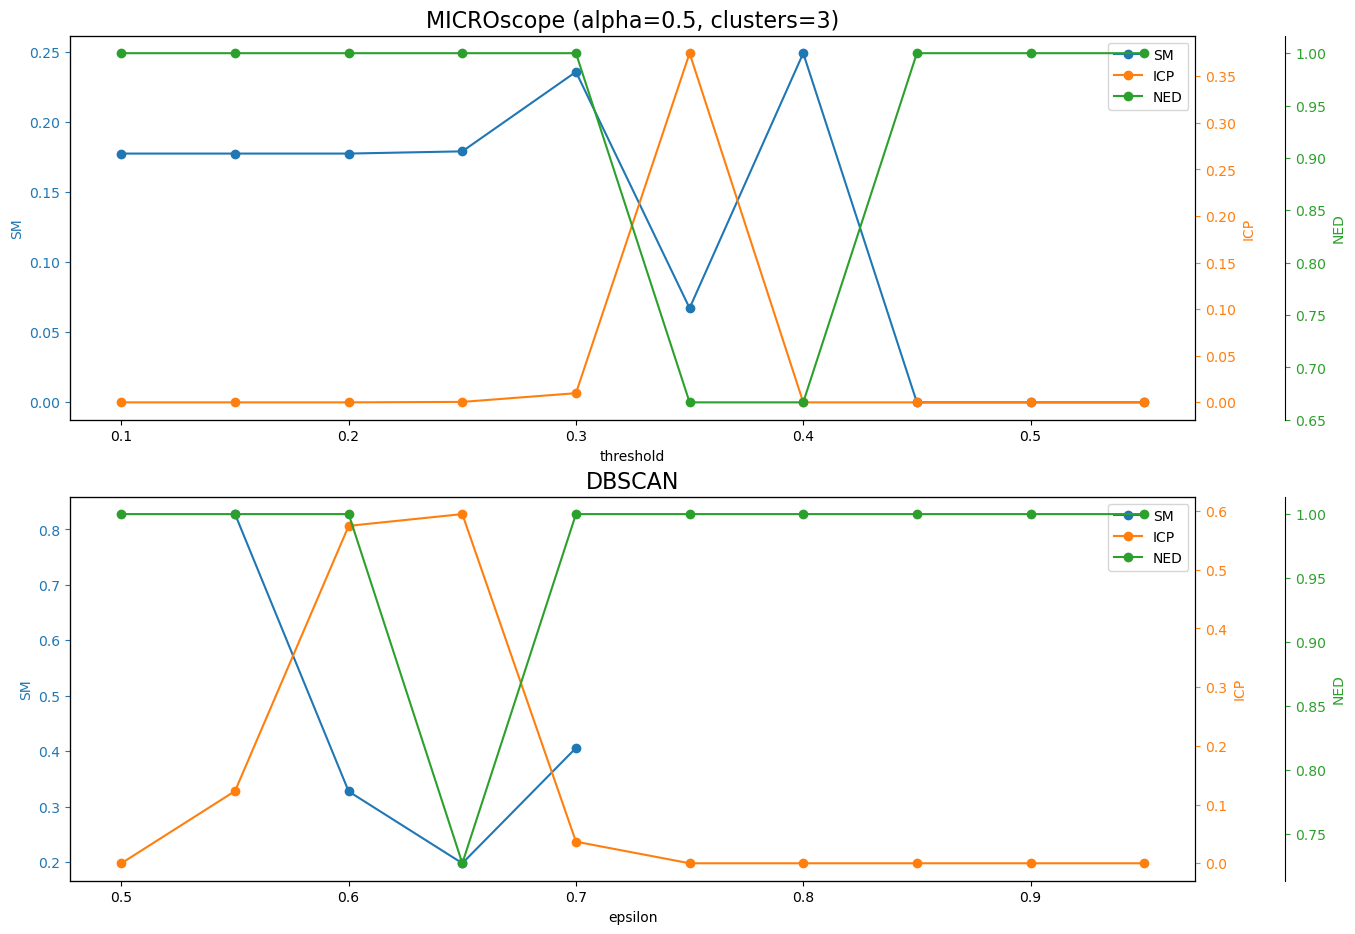

In [17]:
plt.rcParams["figure.figsize"] = (18,2.5)
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(right=0.75, bottom=-2.5)
axs[0].set_title('MICROscope (alpha=0.5, clusters=3)', fontsize=16)
twin1 = axs[0].twinx()
twin2 = axs[0].twinx()
twin2.spines.right.set_position(("axes", 1.08))
p1, = axs[0].plot(threshold, SM_MICROscope, "-oC0", label="SM")
p2, = twin1.plot(threshold, ICP_MICROscope, "-oC1", label="ICP")
p3, = twin2.plot(threshold, NED_MICROscope, "-oC2", label="NED")
axs[0].set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="NED")
axs[0].yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
axs[0].tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())
axs[0].legend(handles=[p1, p2, p3])
axs[1].set_title('DBSCAN', fontsize=16)
twin3 = axs[1].twinx()
twin4 = axs[1].twinx()
twin4.spines.right.set_position(("axes", 1.08))
p4, = axs[1].plot(epsilon, SM_DBSCAN, "-oC0", label="SM")
p5, = twin3.plot(epsilon, ICP_DBSCAN, "-oC1", label="ICP")
p6, = twin4.plot(epsilon, NED_DBSCAN, "-oC2", label="NED")
axs[1].set(xlabel="epsilon", ylabel="SM")
twin3.set(ylabel="ICP")
twin4.set(ylabel="NED")
axs[1].yaxis.label.set_color(p4.get_color())
twin3.yaxis.label.set_color(p5.get_color())
twin4.yaxis.label.set_color(p6.get_color())
axs[1].tick_params(axis='y', colors=p4.get_color())
twin3.tick_params(axis='y', colors=p5.get_color())
twin4.tick_params(axis='y', colors=p6.get_color())
axs[1].legend(handles=[p4, p5, p6])
plt.show()

In [18]:
file_path = "Test_Projects/JPetStore/OneFileSource.java"
alpha = 0.5
min_samples = 2
epsilon = np.arange(0.5, 1, 0.05)
threshold = np.arange(0.1, 0.6, 0.05)
n_clusters = [4 for _ in threshold]

In [19]:
layers_DBSCAN, classes_info_DBSCAN = hierarchical_DBSCAN(file_path, alpha, min_samples, epsilon)


[hierarchical_DBSCAN] parsing the code... done!
[hierarchical_DBSCAN] analyzing method calls... done!
[hierarchical_DBSCAN] building class similarity matrix


[nltk_data] Downloading package punkt to /home/morteza24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morteza24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[SimilarityAnalysis] 100%
[hierarchical_DBSCAN] done!


In [20]:
# MICROscope(file_path, alpha, n_clusters, threshold)
layers_MICROscope, classes_info_MICROscope = MICROscope(file_path, alpha, n_clusters, threshold)


[MICROscope] parsing the code... done!
[MICROscope] analyzing method calls... done!
[MICROscope] building class similarity matrix
[StructuralSimilarity] 100%
[MICROscope] class similarity matrix built successfully!


In [21]:
ICP_MICROscope, ICP_DBSCAN = [], []
NED_MICROscope, NED_DBSCAN = [], []
SM_MICROscope, SM_DBSCAN = [], []
IFN_MICROscope, IFN_DBSCAN = [], []
for i in range(len(threshold)):
    SM_MICROscope.append(EMmicroscope.SM(layers_MICROscope[i], classes_info_MICROscope))
    ICP_MICROscope.append(EMmicroscope.ICP(layers_MICROscope[i], classes_info_MICROscope))
    NED_MICROscope.append(EMmicroscope.NED(layers_MICROscope[i]))
for i in range(len(epsilon)):
    SM_DBSCAN.append(EMdbscan.SM(layers_DBSCAN[i], classes_info_DBSCAN))
    ICP_DBSCAN.append(EMdbscan.ICP(layers_DBSCAN[i], classes_info_DBSCAN))
    NED_DBSCAN.append(EMdbscan.NED(layers_DBSCAN[i]))

/home/morteza24/repos/Monolith-to-Microservice/A_Hierarchical_DBSCAN_Method/EvaluationMeasures.py:73: RuntimeWarning: invalid value encountered in scalar divide
  structural_modularity = SM1 / K - SM2 / ((K*(K-1))/2)


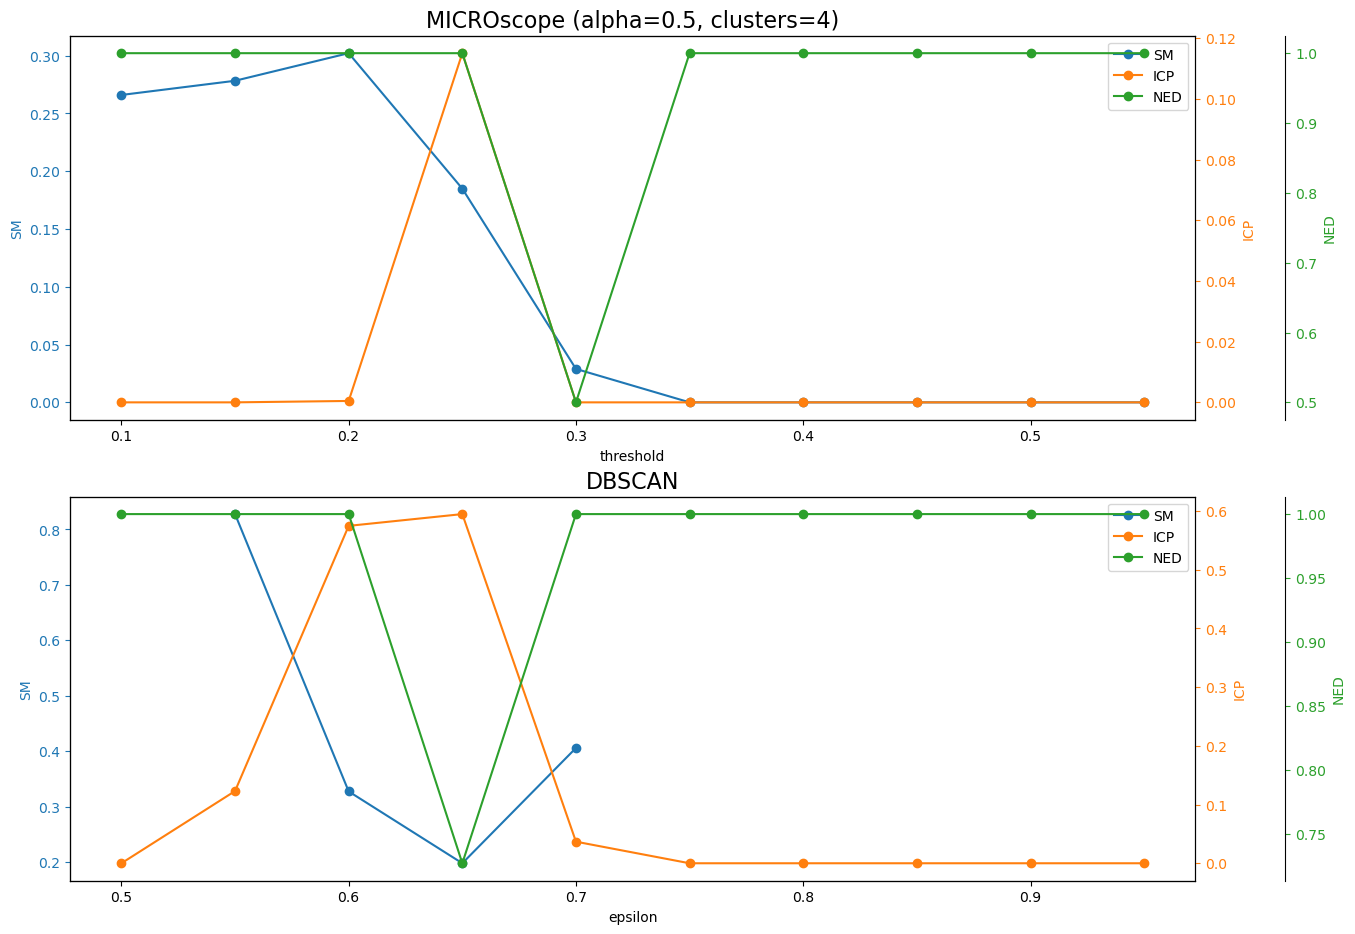

In [23]:
plt.rcParams["figure.figsize"] = (18,2.5)
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(right=0.75, bottom=-2.5)
axs[0].set_title('MICROscope (alpha=0.5, clusters=4)', fontsize=16)
twin1 = axs[0].twinx()
twin2 = axs[0].twinx()
twin2.spines.right.set_position(("axes", 1.08))
p1, = axs[0].plot(threshold, SM_MICROscope, "-oC0", label="SM")
p2, = twin1.plot(threshold, ICP_MICROscope, "-oC1", label="ICP")
p3, = twin2.plot(threshold, NED_MICROscope, "-oC2", label="NED")
axs[0].set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="NED")
axs[0].yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
axs[0].tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())
axs[0].legend(handles=[p1, p2, p3])
axs[1].set_title('DBSCAN', fontsize=16)
twin3 = axs[1].twinx()
twin4 = axs[1].twinx()
twin4.spines.right.set_position(("axes", 1.08))
p4, = axs[1].plot(epsilon, SM_DBSCAN, "-oC0", label="SM")
p5, = twin3.plot(epsilon, ICP_DBSCAN, "-oC1", label="ICP")
p6, = twin4.plot(epsilon, NED_DBSCAN, "-oC2", label="NED")
axs[1].set(xlabel="epsilon", ylabel="SM")
twin3.set(ylabel="ICP")
twin4.set(ylabel="NED")
axs[1].yaxis.label.set_color(p4.get_color())
twin3.yaxis.label.set_color(p5.get_color())
twin4.yaxis.label.set_color(p6.get_color())
axs[1].tick_params(axis='y', colors=p4.get_color())
twin3.tick_params(axis='y', colors=p5.get_color())
twin4.tick_params(axis='y', colors=p6.get_color())
axs[1].legend(handles=[p4, p5, p6])
plt.show()